## 6-1. 군집 알고리즘
#### 학습 목표 
- 흑백 사진을 분류하기 위해 여러 가지 아이디어를 내면서 비지도 학습과 군집 알고리즘에 대해 이해한다. 

#### 시작하기 전 
- 교과서 예제를 보면, 고객이 한빛 마켓이라는 곳에서 사고 싶은 과일 사진을 보내면 그중 가장 많이 요청하는 과일을 판매 품목으로 선정하는 이벤트를 기획하고 있다. 또 1위로 선정된 과일 사진을 보낸 고객 중 몇 명을 뽑아 이벤트 당첨자로 선정할 예정이다. 

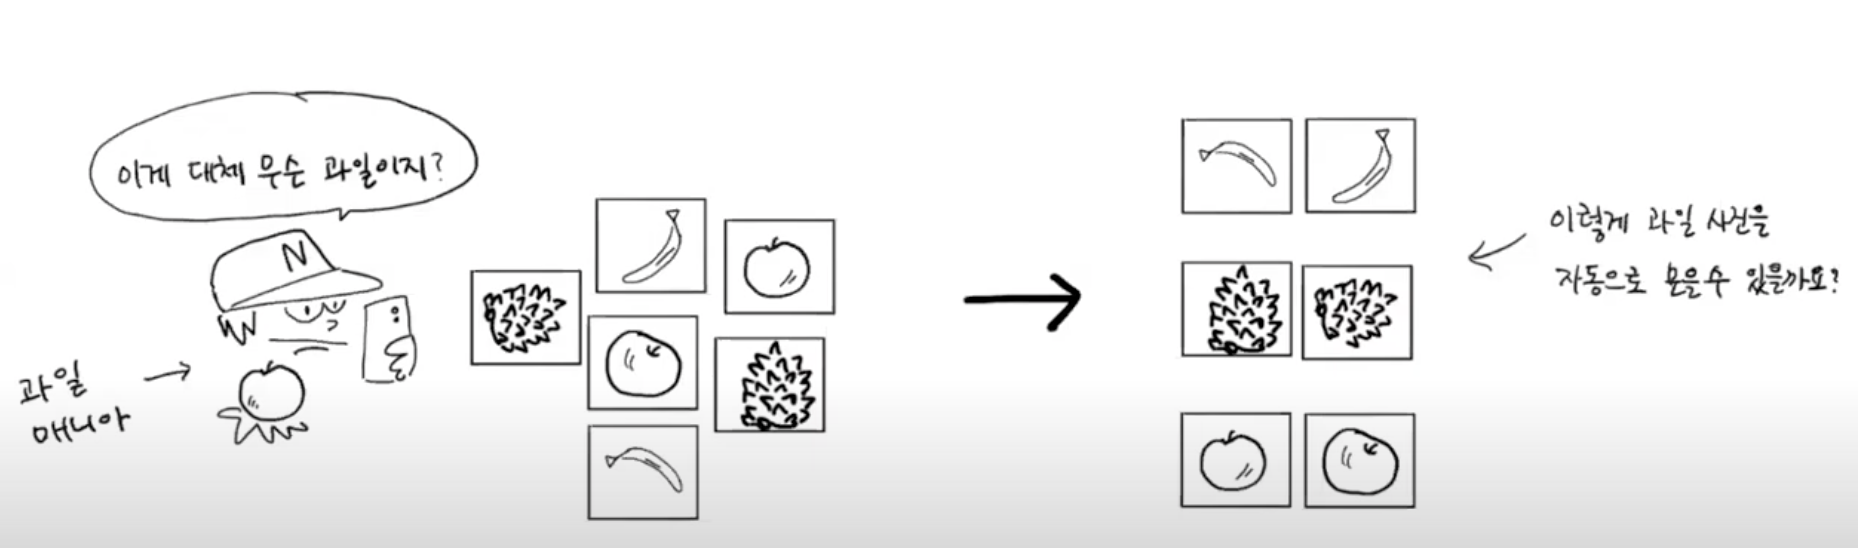

- 그런데 고객이 올린 사진을 사람이 하나씩 분류하기란 쉬운일이 아니다. 그렇다고 생선처럼 미리 과일 분류기를 훈련하기에는 고객들이 어떤 과일 사진을 보낼지 알 수 없는 상황이다. 사진에 대한 정답(타겟)을 아지 못하는데 어떻게 이 사진을 종류대로 모을 수 있을지 알아보자.

## 1. 타깃을 모르는 비지도 학습 
- 이번에는 타깃을 모르는 사진을 종류별로 분류하려고 한다. 이렇게 타깃이 없을 때 사용하는 머신러닝 알고리즘을 **비지도 학습(unsupervised learning)**이라고 한다. 사람이 가르쳐 주지 않아도 데이터에 있는 무언가를 학습하는 것이다. 
- 어떻게 할지 아이디어를 생각하던 중 **"사진의 픽셀값을 모두 평균 내면 비슷한 과일끼리 모이지 않을까?"** 라는 제안을 하였고, 모델을 만들기 위해 받아 놓은 사진 300장으로 해결하고자 한다. 

## 2. 과일 사진 데이터 준비하기 
- 이번에 준비한 과일 데이터는 사과, 바나나, 파인애플을 담고 있는 흑백 사진이다. 이 데이터는 넘파이 배열의 기본 저장 포맷인 npy 파일로 저장되어 있다. 
- 과일 데이터셋 출처: [kaggle_Fruits_360](https://www.kaggle.com/moltean/fruits)

In [1]:
# 과일 사진 데이터셋 다운로드 
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-10-09 07:33:31--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-10-09 07:33:31--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-10-09 07:33:32--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

- 코랩의 코드 셀에서 "!" 문자로 시작하면 코랩은 이후 명령을 파이썬 코드가 아니라 리눅스 shell 명령으로 이해한다.
- wget 명령은 원격 주소에서 데이터를 다운로드하여 저장함을 의미 한다.
- -O 옵션은 저장할 파일 이름을 지정할 때 사용한다. 

In [2]:
# 패키지 임포트 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# numpy를 이용하여 파일 로드하고 파일 크기 확인하기 
fruits = np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


- 이 배열의 첫 번째 차원(300)은 샘플의 개수를 나타내고, 두 번째 차원(100)은 이미지 높이, 세 번째 차원(100)은 이미지 너비를 나타낸다. 
- 이미지 크기는 100 X 100 이며, 각 픽셀은 넘파이 배열의 원소 하나에 대응한다. (즉 배열 크기가 100 X 100 이란 의미이다.)

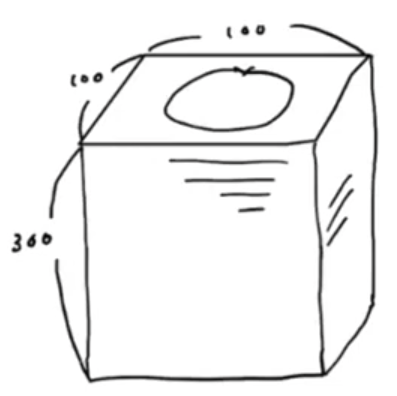

- 첫 번째 이미지의 첫 번째 행을 출력하고자 한다. 3차원 배열이기 때문에 처음 2개의 인덱스를 0으로 지정하고 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자를 쓰면 첫 번째 이미지의 첫 번째 행을 모두 선택할 수 있다.

In [4]:
# 첫 번째 이미지의 첫 번째 행 출력
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


- 첫 번째 행에 있는 픽셀 100개가 들어 있는 값을 출력하였다. 이 넘파이 배열은 흑백 사진을 담고 있으므로 0~255까지의 정숫값을 가진다. 
- 이 정숫값에 대해 조금 더 설명하기 전에 먼저 첫 번째 이미지를 그림으로 그려서 이 숫자와 비교해보자.

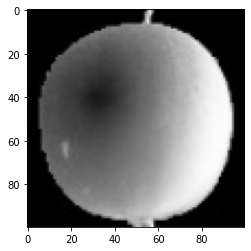

In [5]:
# 첫 번째 이미지 그림으로 출력 
plt.imshow(fruits[0], cmap='gray')
plt.show()

- matplotlib imshow() 함수를 사용하면 넘파이 배열로 저장된 이미지를 쉽게 그릴수 있다. 흑백 이미지 이므로 cmap 매개변수를 'gray'로 지정했다. 
- 첫 번째 이미지는 사과처럼 보인다. 
- 아래의 그림 처럼 첫 번째 행이 위에서 출력한 배열 값에 해당한다. 0에 가까울수록 검게 나타나고 높은 값은 밝게 표시된다.
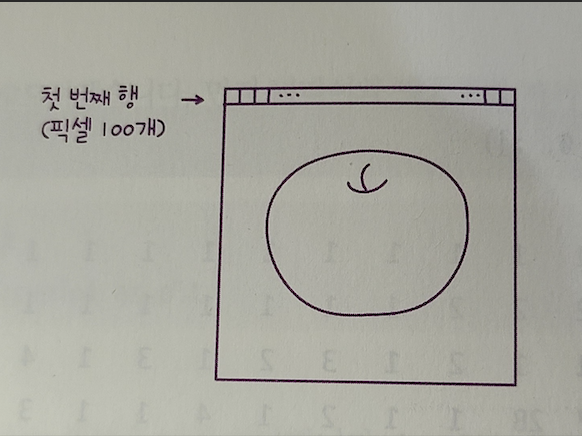

- 보통 흑백 샘플 이미지는 바탕이 밝고 물체(여기서 사과)가 짙은 색이다. 그런데 왜 이렇게 보일까? 
- 사실 이 흑백 이미지는 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨 것이다. 사진의 흰 바탕(높은 값)은 검은색(낮은 값)으로 만들고 실제 사과가 있어 짙은 부분(낮은 값)은 밝은색(높은 값)으로 바꾸었다. 
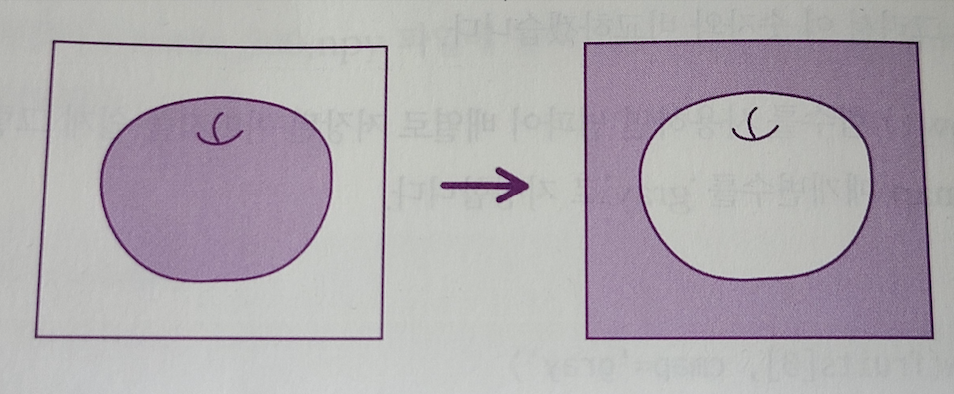

- 그렇다면 왜 이렇게 바꾸었을까? 우리의 관심 대상은 바탕이 아니라 사과이기 때문이다. 흰색 바탕은 우리에게 중요하지 않지만 컴퓨터는 255에 가까운 바탕에 집중할 것이다. 따라서 바탕을 검게 만들고 사진에 짙게 나온 사과를 밝은색으로 만들었다.
- 우리가 보는 것과 컴퓨터가 처리하는 방식이 다르기 때문에 종종 흑백 이미지를 이렇게 반전하여 사용한다. 관심 대상의 영역을 높은 값으로 바꾸었지만 matplotlib으로 출력할 때 바탕이 검게 나오므로 보기에는 좋지 않아 보인다. 여기서 cmap 매개변수를 'gray_r'로 지정하면 다시 반전하여 우리가 눈에 보기 좋게  출력한다.
- 참고로 컴퓨터는 왜 255에 가까운 바탕에 집중할까? 그것은 알고리즘이 어떤 출력을 만들기 위해 곱셈, 덧셈을 한다. 픽셀값이 0이면 출력도 0이 되어 의미가 없어진다. 픽셀값이 높으면 출력값도 커지기 때문에 의미를 부여하기 좋다.

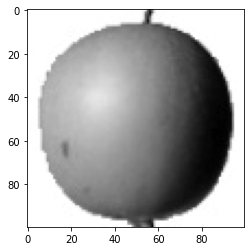

In [6]:
# 바깥 검은 부분 제거 
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

- 위 그림에서 밝은 부분이 0에 가깝고 짙은 부분이 255에 가까운 값이라는 것을 꼭 기억하자
- 이 데이터는 사과, 바나나, 파인애플이 각각 100개씩 들어 있다. 바나나와 파인애플 이미지도 출력해보자.

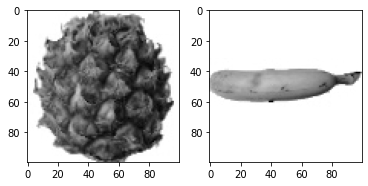

In [7]:
# 파인애플, 바나나 이미지 출력 
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

- 그림이 보기 좋게 나란히 나타났다. matplotlib의 subplots() 함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있도록 도와준다. subplots() 함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정한다. 여기에서는 subplots(1, 2)처럼 하나의 행과 2개의 열을 지정했다. 
- 반환된 axs는 2개의 서브 그래프를 담고 있는 배열이다. axs[0]에 파인애플 이미지를, 그리고 axs[1]에 바나나 이미지를 그렸다. 
- 이제 샘플 데이터가 준비되었다. 이 데이터의 처음 100개는 사과, 그다음 100개는 파인애플, 마지막 100개는 바나나이다. 각 과일 사진의 평균을 내서 차이를 확인해보자.

## 3. 픽셀값 분석하기 
- 사용하기 쉽게 fruits 데이터를 사과, 파인애플, 바나나로 각각 나눈다. 
- 넘파이 배열을 나눌 때 100 X 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만들고자 한다. 이렇게 펼치면 이미지로 출력하긴 어렵지만 배열을 계산할 때 편리하다. 

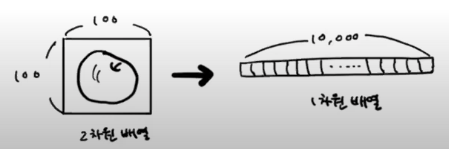

In [8]:
# 다차원 이미지를 1차원 배열로 계산
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

- fruits 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자를 사용한다. 
- 그다음 reshape() 메서드를 사용해 두 번쨰 차원(100)과 세 번째 차원 (100)을 10,000으로 합친다. 
- 첫 번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당한다. 여기서는 첫 번째 차원이 샘플 개수이다.

In [9]:
# 배열 크기 확인 
print(apple.shape)

(100, 10000)


- 배열의 크기를 확인해보니 (100, 10000)으로 계산이 잘 되었다. 
- 이제 apple, pineapple, banana 배열을에 들어 있는 샘플의 픽셀 평균값을 numpy의 mean()을 이용하여 계산해보자.
- 샘플마다 픽셀의 평균값을 계산해야 하므로 mean() 메서드가 평균을 계산할 축을 지정해야한다. 'axis=0'으로 하면 첫 번째 축인 행을 따라 계산하고 'axis=1'로 지정하면 두 번째 축인 열을 따라 계산한다. 
- 참고로 axis 인수는 2절에도 잠깐 나왔지만, 아래의 그림을 보면 axis는 배열의 '축'을 의미한다. 다음의 apple 2차원 배열에서 axis=1일 때는 열 방향으로 계산하고, axis=0일 때는 행 방향으로 계산한다. 

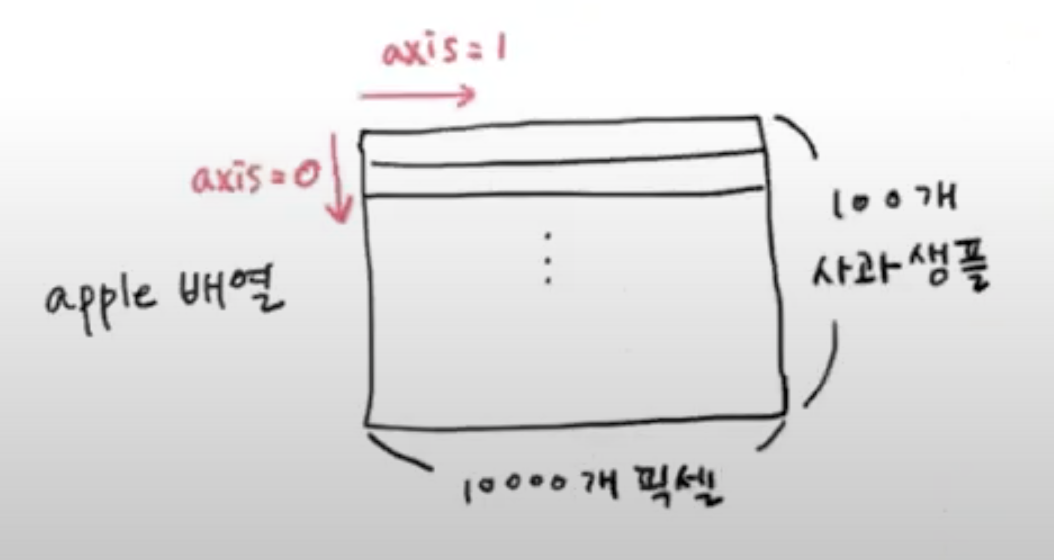

- 우리가 필요한 것은 샘플의 평균값이다. 샘플은 모두가 가로로 값을 나열했으니 'axis=1'로 지정하여 평균값을 계산하고자한다.(앞서 2차원 배열을 1차원 배열로 치환했기에 행을 기준으로 계산한다.)
- 평균을 계산하는 numpy의 np.mean() 함수를 사용해도 되지만 numpy 배열은 이런 함수들을 메서드로도 제공한다. apple 배열의 mean() 메서드로 각 샘플의 픽셀 평균값을 계산해보자.

In [10]:
# apple의 샘플의 픽셀 평균값 계산 
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


- 사과 샘플 100개에 대한 픽셀 평균값을 계산했다. 
- matplotlib의 hist() 함수를 사용해 사과, 파인애플, 바나나의 픽셀 평균값이 어떻게 분포되어 있는지 알아보기위해 히스토그램을 그려보자.
- 참고로 alpha 매개변수를 1보다 작게 하면 투명도, legend() 함수를 사용하면 범례를 만든다.

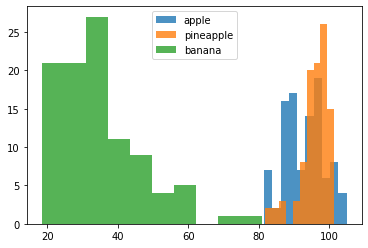

In [12]:
# 픽셀 평균값 히스토그램 시각화 
plt.hist(np.mean(apple, axis=1), alpha=0.8) # 사과 픽셀 평균값 
plt.hist(np.mean(pineapple, axis=1), alpha=0.8) # 파인애플 픽셀 평균값
plt.hist(np.mean(banana, axis=1), alpha=0.8)  # 바나나 픽셀 평균값
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

- x축은 구간(픽셀의 평균값), y축은 빈도수를 나타낸다. 
- 히스토그램을 보면 바나나 사진의 평균값은 40 아래로 집중되어 있고, 사과와 파인애플은 90에서 100 사이에 많이 모여있다. 바나나는 픽셀 평균값만으로 사과나 파인애플과 확실히 구분된다. 그리고 바나나는 사진에서 차지하는 영역이 작기 때문이 평균값이 작다. 
- 반면 사과와 파인애플은 많이 겹쳐있어서 픽셀값만으로는 구분하기 쉽지 않다. 사과나 파인애플은 대체로 형태가 동그랗고 사진에 차지하는 크기도 비슷하기 때문이다. 
- 좀 더 나은 방법은 샘플의 평균값이 아닌 픽셀별 평균값을 비교해보는 것으로 전체 샘플에 대해 각 픽셀의 평균을 계산하는 것이다. 세 과일은 모양이 다르므로 픽셀값이 높은 위치가 조금 다를 것 같다. 
- 픽셀의 평균을 계산하는 법은 'axis=0'으로 지정하는 방법이 있다. 이번에는 matplotlib의 bar() 함수를 사용하여 픽셀 10,000개에 대한 평균값을 막대그래프로 그려보겠다.

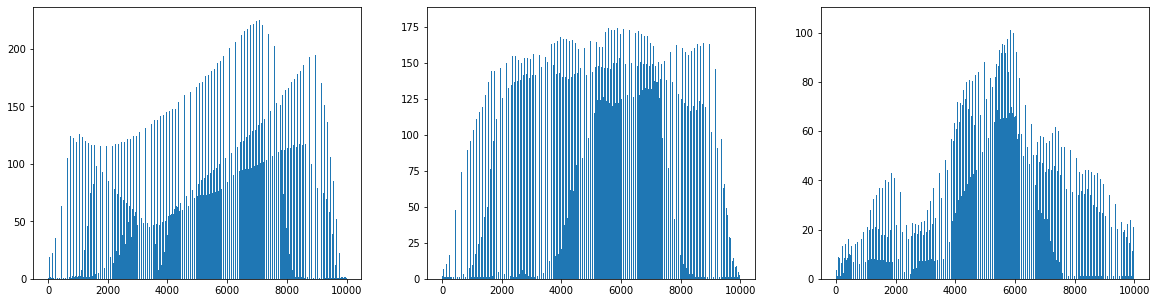

In [13]:
# 픽셀 10,000개에 대한 사과, 파인애플, 바나나의 막대그래프 시각화 
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))   # 사과
axs[1].bar(range(10000), np.mean(pineapple, axis=0))  # 파인애플
axs[2].bar(range(10000), np.mean(banana, axis=0))   # 바나나 
plt.show()

- x축은 픽셀, y 축은 픽셀 평균값을 나타낸다.
- 순서대로 사과, 파인애플, 바나나 그래프이다. 3개의 그래프를 보면 과일마다 값이 높은 구간이 다르다. 사과는 사진 아래쪽으로 갈수록 값이 높아지고, 파인애플 그래프는 비교적 고르면서 높다. 바나나는 확실히 중앙의 픽셀값이 높다. 
- 픽셀 평균 값을 100 X 100 크기로 바꿔서 이미지처럼 출력하여 위 그래프와 비교하면 더 좋다.

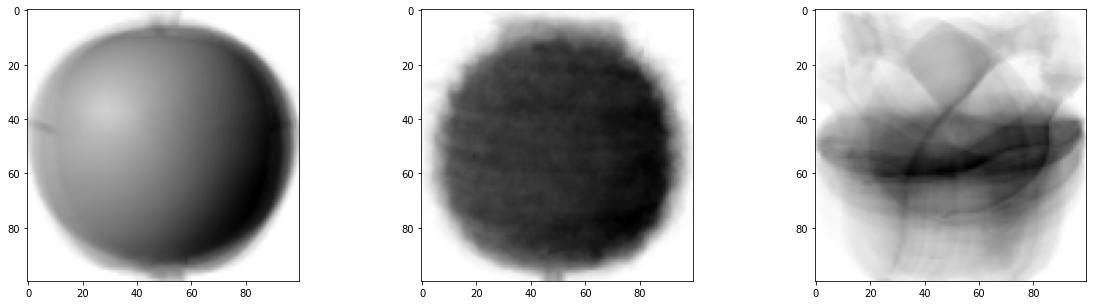

In [14]:
# 위 그래프와 비교를 위해 픽셀 평균 값 100 X 100 크기로 바꿔 이미지 형태로 출력 (1차원 -> 2차원으로 다시 변경)
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

- 세 과일은 픽셀 위치에 따라 값의 크기가 차이난다. 따라서 이 대표 이미지와 가까운 사진을 골라낸다면 사과, 파인애플, 바나나를 구분할 수 있지 않을까?

## 4. 평균값과 가까운 사진 고르기 
- 사과 사진의 평균값인 apple_mean과 가장 가까운 사진을 골라보자. 3절에서 봤던 절대값 오차를 사용하고자 한다. fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절대값의 평균을 계산하면 된다.
- 절대값 계산을 위해 numpy abs() 함수를 사용한다. 예를 들어 np.aps(-1)은 1을 반환한다. 배열을 입력하면 모든 원소의 절댓값을 계산하여 입력과 동일한 크기의 배열을 반환한다. 이 함수는 np.absolute() 함수의 다른 이름이다. 


In [15]:
# 절대값 계산 
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


- abs_diff는 (300, 100, 100) 크기의 배열이다. 따라서 각 샘플에 대한 평균을 구하기 위해 axis에 두 번째, 세 번째 차원을 모두 지정했다. 이렇게 계산한 abs_mean은 각 샘플의 오차 평균이므로 크기가 (300,) 인 1차원 배열이다. 
- 그런 다음 이 값이 가장 작은 순서대로 100개를 골라본다. 즉 apple_mean과 오차가 가장 작은 샘플 100개를 고르는 셈이다. 
- np.argsort() 함수는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환한다. 

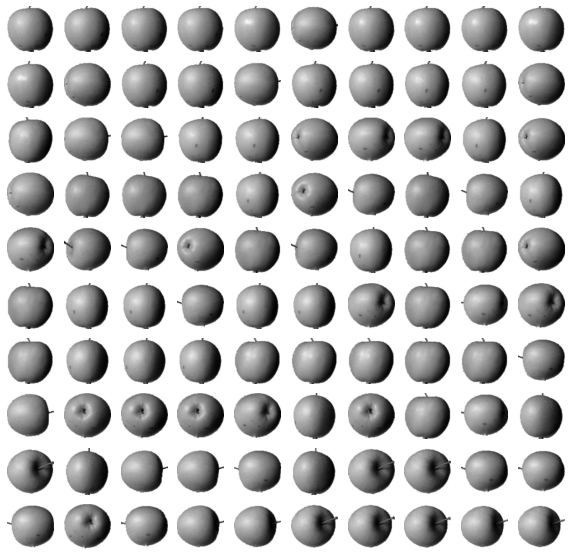

In [16]:
# 100개를 선택해 10 X 10 격자로 이루어진 그래프 그리기 
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

- apple_mean과 가장 가까운 사진 100개를 골랐더니 모두 사과가 나왔다. 
- 먼저 subplot() 함수로 10 X 10, 총 100개의 서브 그래프를 만든다. 
- 그다음 2중 for 반복문을 순회하면서 10개의 행과 열에 이미지를 출력한다. axs는 (10, 10) 크기의 2차원 배열이므로 i, j 두 첨자를 사용하여 서브 그래프 위치를 지정한다. 
- 또한 깔끔한 이미지만 그리기 위해 axis('off')를 사용하여 좌표축을 그리지 않는다.

- 흑백사진에 있는 픽셀값을 사용해 과일 사진을 모으는 작업을 해보았다. 이렇게 비슷한 샘플끼리 그룹으로 모으는 작업을 **'군집(clustering)'**이라고 한다. 
- 군집은 대표적인 비지도 학습 중 하나이다. 군집 알고리즘에서 만든 그룹을 **클러스터(cluster)**라고 부른다.  
- 하지만 우리는 이미 사과 파인애플 바나나가 있다는 것을 알고 있다. 즉 타깃값을 알고 있었기 때문에 사과, 파인애플, 바나나의 사진 평균값을 계산해서 가장 가까운 과일을 찾을 수 있었다. 하지만 실제로 비지도 학습에서는 타깃값을 모르기 때문에 이처럼 샘플의 평균값을 미리 구할 수 없다. 
- 다음절에서는 타깃값을 모르면서 어떻게 세 과일의 평균값을 구할수 있을지 해결해주는 k-평균 알고리즘을 알아보고자 한다.

## 문제해결 과정 및 결론 
- 문제 해결 과정 
    - 타깃값이 없을 때 데이터에 있는 패턴을 찾거나 데이터 구조를 파악하는 머신러닝 방식을 비지도 학습이라고 한다. 
    - 타깃이 없기 때문에 알고리즘을 직접적으로 가르칠 수가 없다. 대신 알고리즘은 스스로 데이터가 어떻게 구성되어 있는지 분석한다.
    - 대표적인 비지도 학습 문제는 '군집'이다. 군집은 비슷한 샘플끼리 그룹으로 모으는 작업을 말한다. 이 절에서는 사진의 픽섹을 사용해 군집과 비슷한 작업을 수행해 보았다. 
    - 하지만 샘플이 어떤 과일인지 미리 알고 있었기 때문에 사과 사진의 평균값을 알 수 있었다. 실제 비지도 학습에서는 타깃이 없는 사진을 사용해야 한다. (다음 절에서 이런 경우 어떻게 샘플 그룹의 평균값을 찾는지 알아본다.)